In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv("updatedData.csv")
data.head(2)

,Unnamed: 0.1,Unnamed: 0,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,...,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,genders
0,0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,male
1,1,1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,male


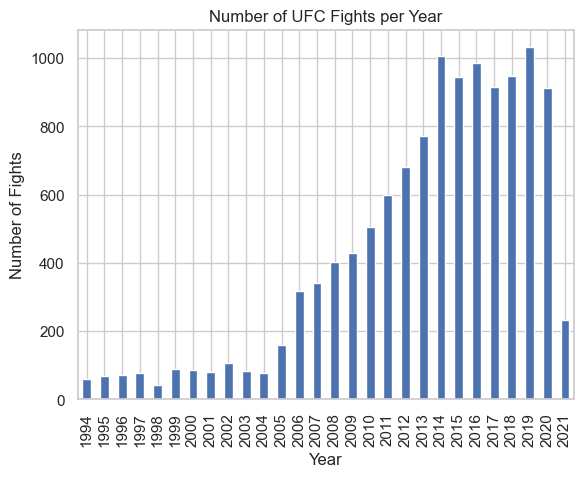

In [31]:
# convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# extract the year from the 'date' column
data['year'] = data['date'].dt.year

# group the fights by year and count the number of fights per year
fights_per_year = data.groupby('year')['r_fighter'].count() + data.groupby('year')['b_fighter'].count()

# plot the number of fights per year
sns.set_style('whitegrid')
fights_per_year.plot(kind='bar')
plt.title('Number of UFC Fights per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.show()

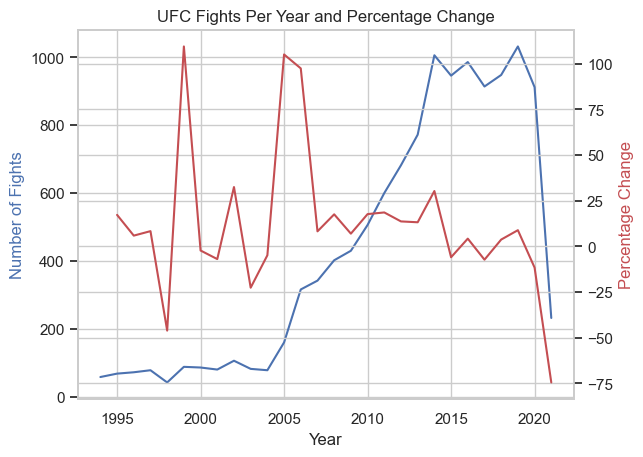

In [32]:
percent_change = fights_per_year.pct_change() * 100

# create a figure with two y-axes

fig, ax1 = plt.subplots()
sns.set_style('whitegrid')
ax1.plot(fights_per_year.index, fights_per_year, color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fights', color='b')
ax2 = ax1.twinx()
ax2.plot(percent_change.index, percent_change, color='r')
ax2.set_ylabel('Percentage Change', color='r')
plt.title('UFC Fights Per Year and Percentage Change')
# plt.legend(['Number of Fights', 'Percentage Change'])
plt.show()

In [33]:
# # fights_per_venue = data['location'].value_counts()

# # # create a figure with two subplots
# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # # plot the number of fights per venue on the left subplot
# # ax1.barh(fights_per_venue.index, fights_per_venue.values, color='b')
# # ax1.set_xlabel('Number of Fights')
# # ax1.set_ylabel('Venue')
# # ax1.set_title('Number of UFC Fights Per Venue')

# # # plot the distribution of fights per venue on the right subplot
# # ax2.hist(fights_per_venue.values, bins=range(0, 50, 2), color='b')
# # ax2.set_xlabel('Number of Fights')
# # ax2.set_ylabel('Number of Venues')
# # ax2.set_title('Distribution of UFC Fights Per Venue')

# # # display the chart
# # plt.show()

# # group the fights by venue and count the number of fights
# fights_per_venue = data.groupby('location').size().reset_index(name='Number of Fights')

# # sort the venues by the number of fights in descending order
# fights_per_venue = fights_per_venue.sort_values(by='Number of Fights', ascending=False)

# # display the top 5 venues by number of fights
# print(fights_per_venue.head())

# # display the full information of all venues
# print(fights_per_venue)

Top 10 venues by number of fights:
                                       location  Number of Fights
78                       Las Vegas, Nevada, USA              1565
0    Abu Dhabi, Abu Dhabi, United Arab Emirates               157
82              London, England, United Kingdom               114
104                     Newark, New Jersey, USA                90
5                      Anaheim, California, USA                84
39                       Chicago, Illinois, USA                81
98                     Montreal, Quebec, Canada                81
7                Atlantic City, New Jersey, USA                80
83                 Los Angeles, California, USA                79
154                    Toronto, Ontario, Canada                74
Table for the remaining venues:
                       location  Number of Fights
26   Boston, Massachusetts, USA                72
149           Stockholm, Sweden                72
124      Rio de Janeiro, Brazil                69
69     

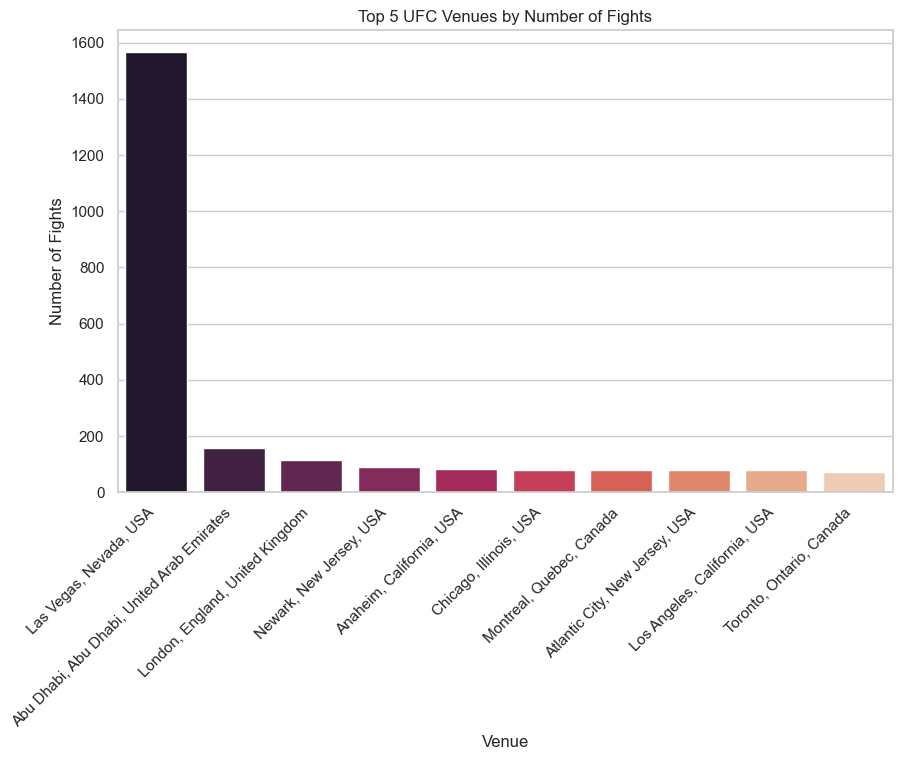

In [34]:
fights_per_venue = data.groupby('location').size().reset_index(name='Number of Fights')

fights_per_venue = fights_per_venue.sort_values(by='Number of Fights', ascending=False)

top_venues = fights_per_venue.head(10)
print("Top 10 venues by number of fights:")
print(top_venues)

other_venues = fights_per_venue.iloc[10:]
print("Table for the remaining venues:")
print(other_venues)

# plot a barplot for the top 5 venues
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='location', y='Number of Fights', data=top_venues, palette='rocket')
ax.set_title('Top 10 UFC Venues by Number of Fights')
ax.set_xlabel('Venue')
ax.set_ylabel('Number of Fights')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


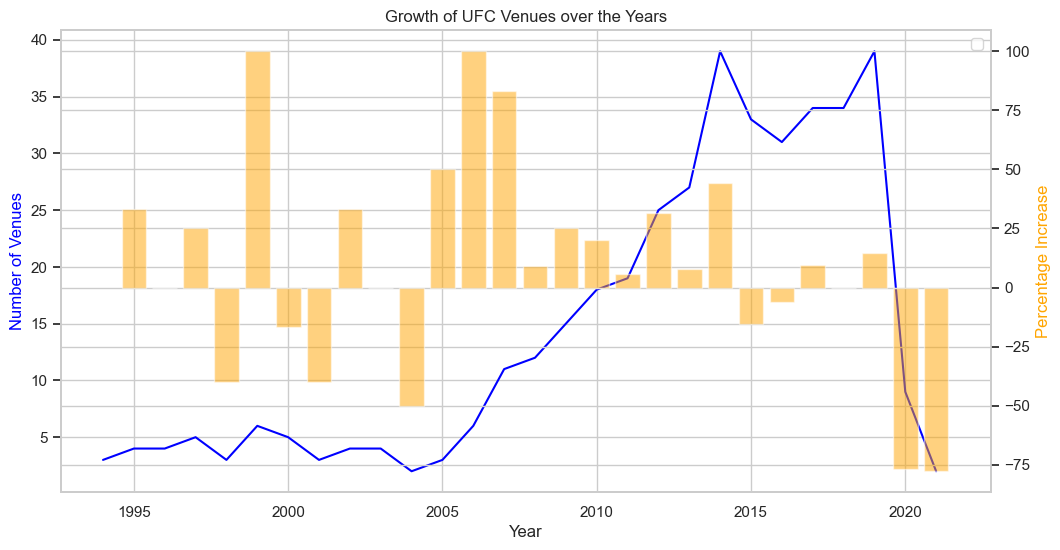

In [35]:

venues_per_year = data.groupby('year')['location'].nunique()

percentage_increase = venues_per_year.pct_change() * 100

sns.set(style='whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot the number of venues as a line plot
ax1.plot(venues_per_year.index, venues_per_year.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Venues', color='blue')

# plot the percentage increase as a bar plot
ax2 = ax1.twinx()
ax2.bar(percentage_increase.index, percentage_increase.values, color='orange', alpha=0.5)
ax2.set_ylabel('Percentage Increase', color='orange')
ax2.legend()

# set the title and display the plot
ax1.set_title('Growth of UFC Venues over the Years')
plt.show()
